# Phase_3_Project 


## Dataset: Churn in Telecom's dataset

#### Understand data information in the given dataset

1- state: the US state in which the customer resides, indicated by a two-letter abbreviation

2- account length: the number of days that this account has been active

3- area Code: the three-digit area code of the corresponding customer’s phone number

4- phone: the remaining seven-digit phone number

5- international plan: whether the customer has an international calling plan: yes/no

6- voice mail plan: whether the customer has a voice mail feature: yes/no

7- number vmail messages: presumably the average number of voice mail messages per day

8- total day minutes: the total number of calling minutes used during the day

9- total day calls: the total number of calls placed during the day

10- total day charge: the billed cost of daytime calls

11- total eve minutes: the total number of calling minutes used during the evening

12- total eve calls: the total number of calls placed during the evening

13- total eve charge: the billed cost of evening time calls

14- total night minutes: the total number of calling minutes used during the night

15- total night calls: the total number of calls placed during the night

16- total night charge: the billed cost of nighttime calls

17- total intl minutes: the total number of international minutes

18- total intl calls: the total number of international calls

19- total intl charge: the billed cost for international calls

20- customer service calls: the number of calls placed to Customer Service

21- Churn: whether the customer left the service: true/false

# A-DATA WRANGLING

## Churn in Telecom's dataset

Start to import necessary library.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Import the data file.

In [2]:
ls

Data/                                 README.md
Modelling.ipynb                       corrmat.jpg
Project_3_Data_Wrangling + EDA.ipynb


In [3]:
data = pd.read_csv('Data/bigml_59c28831336c6604c800002a.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Except "churn" column is in boolean data, there are 4 columns of object data, which are "state","phone number","international plan", and "voice mail plan". The remaining columns are numeric data so that we will check their distribution as normal distribution or not.

In [5]:
data.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

It is great that there is missing or null data.

In [6]:
data.shape

(3333, 21)

In [7]:
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
pd.set_option('display.max_columns',None)
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

#### Since the data is already clean, there is no need for any further adjustments. Therefore, I will proceed with keeping the data wrangling and exploratory data analysis parts in the same notebook.

# B-EXPLORATORY DATA ANALYSIS (EDA)

## 1. Data distribution observation

In [10]:
data_numeric = data.select_dtypes(include=np.number)
numeric_columns = data_numeric.columns
numeric_columns

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

In [11]:
len(numeric_columns)

16

In [12]:
numeric_columns[1]

'area code'

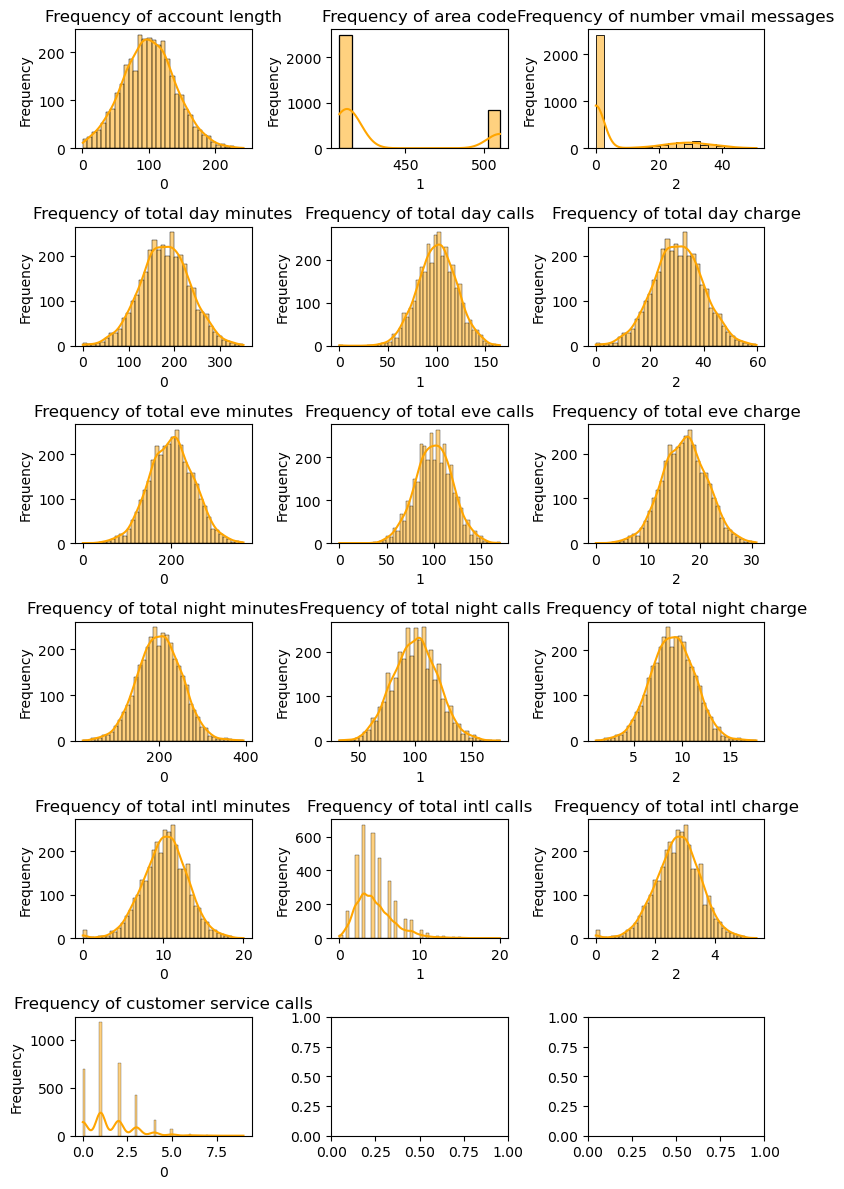

In [13]:
total_col = 3
if len(numeric_columns) % total_col == 0:
    total_row = len(numeric_columns) // total_col
else:
    total_row = len(numeric_columns) // total_col + 1
    
fig, axes = plt.subplots(total_row, total_col, figsize=(8, 12))

for i in range(len(numeric_columns)):
    row = i // total_col
    col = i % total_col

    sns.histplot(data[numeric_columns[i]], kde=True, color='orange', edgecolor='black', ax=axes[row, col])
    axes[row, col].set_xlabel(col)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title('Frequency of '+ str(numeric_columns[i]))

plt.tight_layout()
plt.show();

All features above are normally distributed except 'customer service calls', 'area code', 'number vmail messages'. 'total intl calls' is  right-skewed normal distribution as its mean is greater than its mode.

In [14]:
data['total intl calls'].mean()

4.4794479447944795

In [15]:
data['total intl calls'].mode()

0    3
Name: total intl calls, dtype: int64

Double check normal distribution with Q-Q plots.

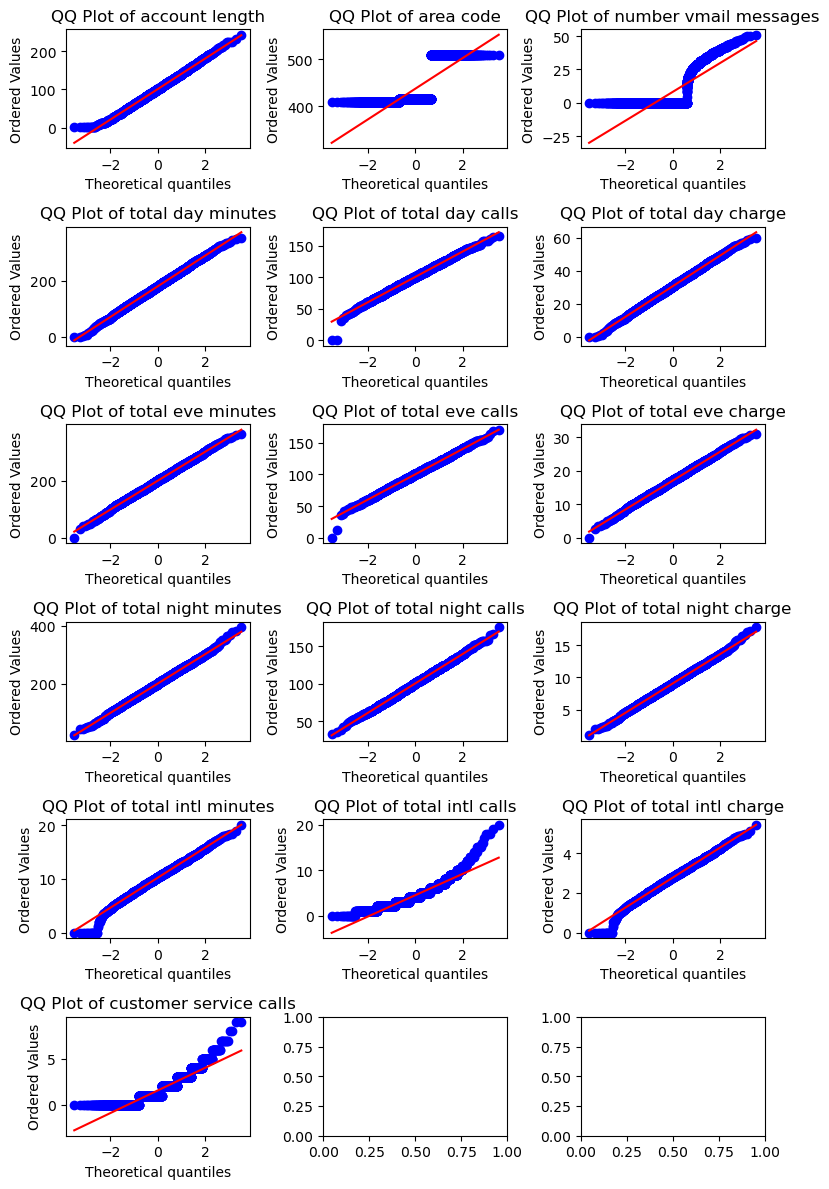

In [16]:
fig, axes = plt.subplots(total_row, total_col, figsize=(8, 12))

for i in range(len(numeric_columns)):
    row = i // total_col
    col = i % total_col

    stats.probplot(data[numeric_columns[i]], dist='norm', plot=axes[row, col])
    axes[row, col].set_title('QQ Plot of ' + numeric_columns[i])

plt.tight_layout()
plt.show()

Clearly, area code, number of voice mail messages and customer service calls are not normally distributed.

### Analyse data by heat map and pairplot

Turn target column 'churn' into number for further analysis.

In [17]:
data1 = data.copy()

In [18]:
data1['churn'] = data1['churn'].astype(int)

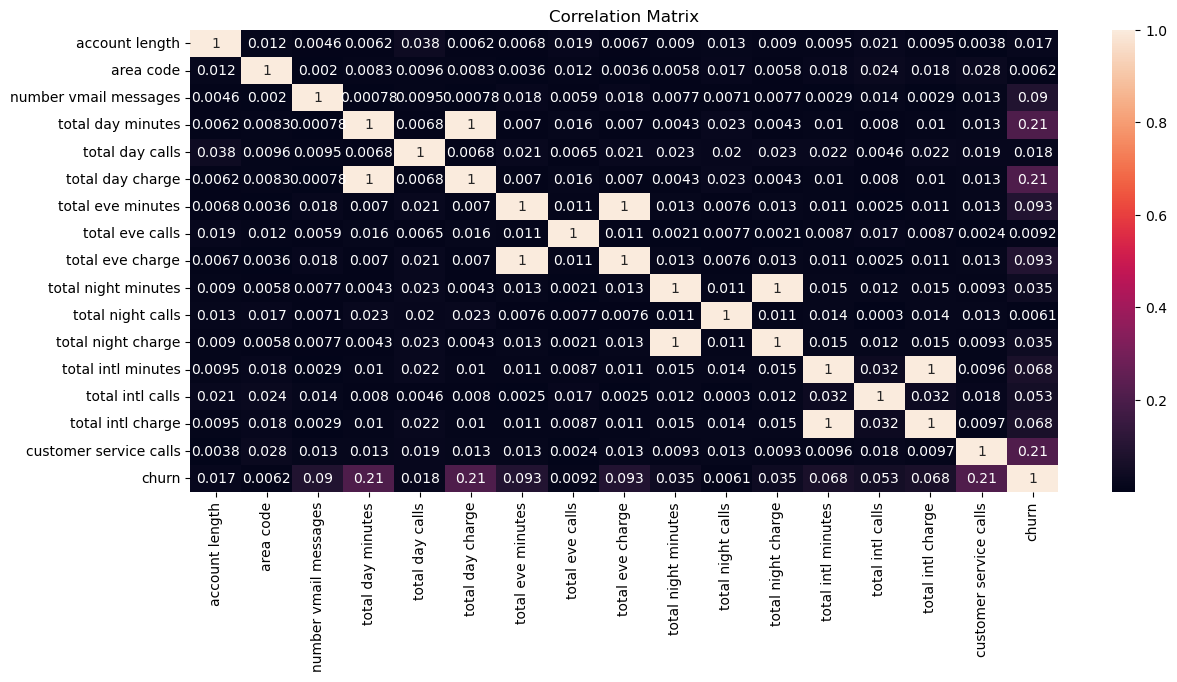

In [19]:
plt.figure(figsize=(14, 6))
sns.heatmap(data1.corr(numeric_only=True).abs(), annot=True)
plt.title('Correlation Matrix')
plt.savefig("corrmat.jpg", dpi = 300)
plt.show()

From the chart above, churn is highly correlated with customer service calls, total day charge, total day minutes and international plan.

In [20]:
sns.pairplot(hue = 'churn',data = data1)
plt.show()

There is a clear classification of churn when the number of customer service calls exceeds 3.

## 2. Features analysis.

### 2.1. Feature: Account length

In [ ]:
data['account length'].value_counts()

In [ ]:
data['account length'].quantile(0.98)

Account length represents the duration for which an account has been active, spanning from 1 day to 243 days. The majority (98%) of accounts have a length of up to 185 days, which is roughly equivalent to 6 months. This implies that our focus is primarily on assessing the churn possibility among new customers.

Turn account length into months.

In [ ]:
#  Create intervals of account_length for grouping purposes:
account_length_interval = [0, 30, 60, 90,120,150,180,float('inf')]

# Create a new column of account length:
data.loc[:, 'account_length_month'] = pd.cut(data['account length'], bins=account_length_interval,
                                             labels=[1, 2, 3,4,5,6,7] )

In [ ]:
data['account_length_month'] = data['account_length_month'].cat.add_categories([0]).fillna(0).astype(int)


In [ ]:
data['account_length_month'].value_counts(normalize=True)

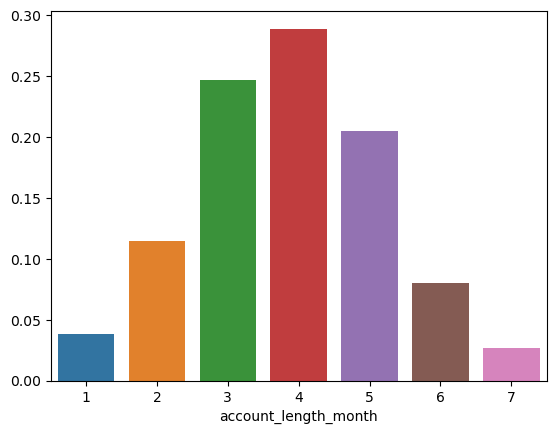

In [ ]:
sns.barplot(x= data['account_length_month'].value_counts(normalize=True).index,y = data['account_length_month'].value_counts(normalize=True).values);

Accounts from 3rd month to 5th month account for more than 72%.

There are no clear gap of account length comparing churning customers and staying customers.

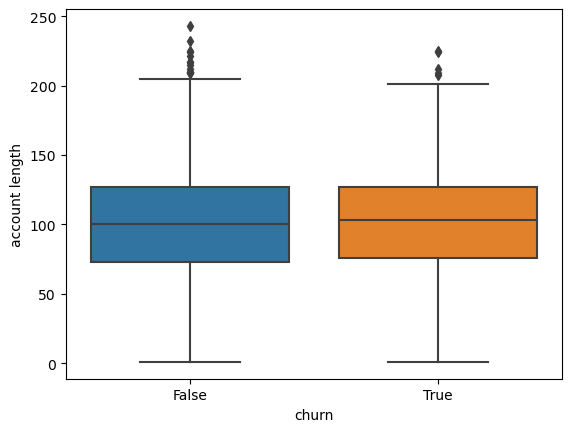

In [27]:
sns.boxplot(x = 'churn', y = 'account length', 
            data = data, orient = 'v')
plt.show()

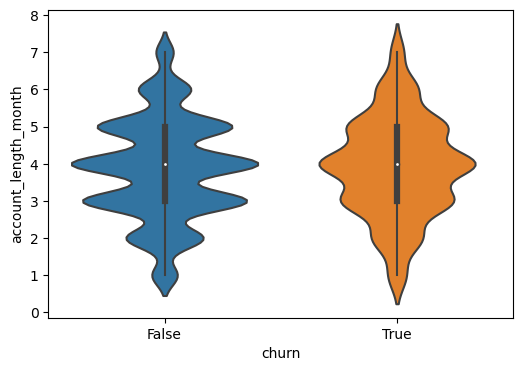

In [28]:
plt.figure(figsize=(6,4))
sns.violinplot(x = 'churn', y = 'account_length_month', data = data);

Calculate churn percentage in each account length month.

In [29]:
counts_length = data.groupby('account_length_month')['churn'].value_counts()
percentages_length = data.groupby('account_length_month')['churn'].value_counts(normalize=True) * 100
percentages_length

account_length_month  churn
1                     False    85.937500
                      True     14.062500
2                     False    87.206266
                      True     12.793734
3                     False    86.601705
                      True     13.398295
4                     False    84.008307
                      True     15.991693
5                     False    85.630499
                      True     14.369501
6                     False    84.701493
                      True     15.298507
7                     False    85.227273
                      True     14.772727
Name: proportion, dtype: float64

In [30]:
true_perc_length = percentages_length.loc[:, True]
true_perc_length

account_length_month
1    14.062500
2    12.793734
3    13.398295
4    15.991693
5    14.369501
6    15.298507
7    14.772727
Name: proportion, dtype: float64

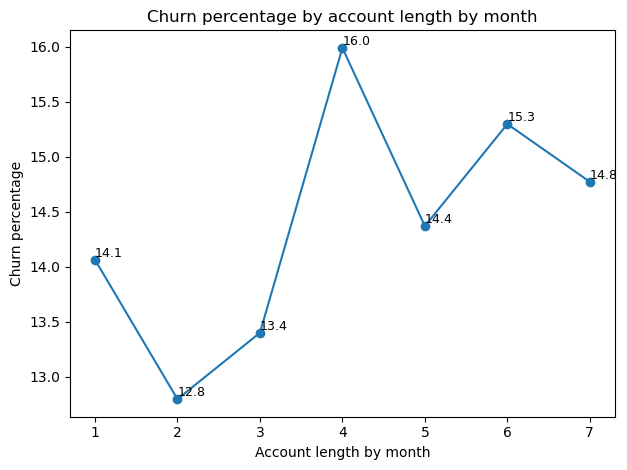

In [31]:
true_perc_length.plot(kind='line',marker='o')
plt.xlabel('Account length by month')
plt.ylabel('Churn percentage')
plt.title('Churn percentage by account length by month')
for x, y in zip(true_perc_length.index, true_perc_length.values):
    plt.text(x, y, str(round(y,1)), ha='left', va='bottom', ma = 'left',fontsize=9)

plt.tight_layout()

plt.show();

The churn rate falls between 13% to 16%, which is significantly lower than the average churn rate in the telecom industry, which is approximately 21% (as of 2020). One possible reason that can explain this favorable performance is the promotion of new account registrations.

However, starting from the 3rd month, the churn rate began to rise and remained high in the subsequent months. Based on this observation, it is advisable to consider implementing a retention plan earlier, specifically after the 3rd month of the account length.

### 2.2. Feature: voice mail plan

Calcute the voice mail plan percentage between leaving and staying customers.

In [32]:
counts_voicemail_plan = data.groupby('voice mail plan')['churn'].value_counts()
print(counts_voicemail_plan)
percentages_voicemail_plan = data.groupby('voice mail plan')['churn'].value_counts(normalize=True) * 100
print('----')
print(percentages_voicemail_plan)

voice mail plan  churn
no               False    2008
                 True      403
yes              False     842
                 True       80
Name: count, dtype: int64
----
voice mail plan  churn
no               False    83.284944
                 True     16.715056
yes              False    91.323210
                 True      8.676790
Name: proportion, dtype: float64


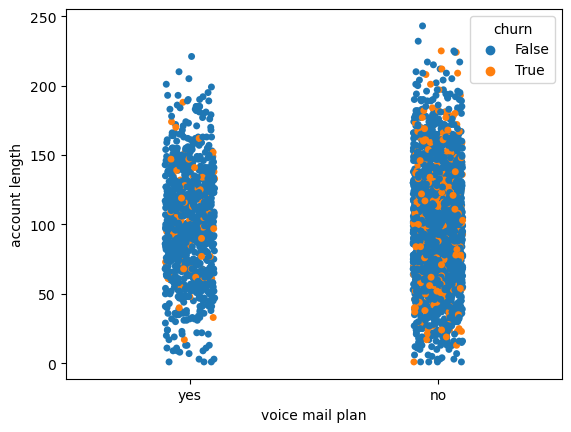

In [33]:
sns.stripplot(x = 'voice mail plan', y = 'account length', data = data, hue = 'churn', alpha = 1)
plt.show()

In [34]:
percentages_voicemail_plan.loc[:,True]

voice mail plan
no     16.715056
yes     8.676790
Name: proportion, dtype: float64

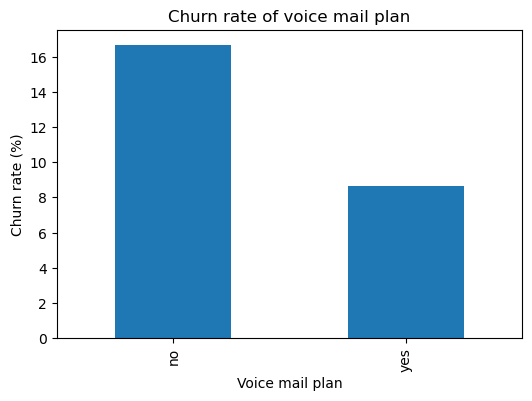

In [35]:
plt.figure(figsize=(6,4))
percentages_voicemail_plan.loc[:,True].plot(kind='bar')
plt.xlabel('Voice mail plan')
plt.ylabel('Churn rate (%)')
plt.title('Churn rate of voice mail plan');

Accounts with a voice mail plan have a churn rate of approximately 8.6%, whereas accounts without a voice mail plan exhibit a nearly double churn rate of around 16%. This observation suggests that customers who actively utilize the company's services are less likely to switch to other operators. Therefore, it is advisable for the company to focus on increasing the number of voice mail subscribers.

### 2.3. Feature: number vmail messages

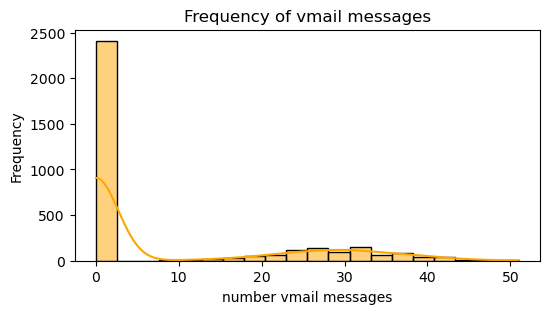

In [36]:
plt.figure(figsize=(6, 3))
sns.histplot(data['number vmail messages'], kde=True, color='orange', edgecolor='black')
plt.xlabel('number vmail messages')
plt.ylabel('Frequency')
plt.title('Frequency of vmail messages')
plt.show()

The number of voice mail messages seem to have significant variation.

Initially, when examining the average number of voice mail messages, it appears that churning customers utilize approximately 5 messages per day, while loyal customers use around 8.6 messages daily.

In [37]:
mean_voicemailmesg = data.groupby('churn')['number vmail messages'].mean()
print(mean_voicemailmesg)


churn
False    8.604561
True     5.115942
Name: number vmail messages, dtype: float64


However, upon further analysis of the boxplot and violinplot below, it is evident that the number of voice mail messages varies significantly between loyal and disloyal customers.

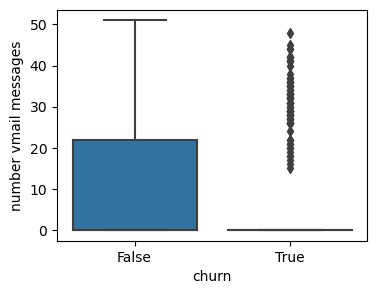

In [38]:
plt.figure(figsize=(4,3))
sns.boxplot(x = 'churn', y = 'number vmail messages', data = data, orient = 'v')
plt.show()

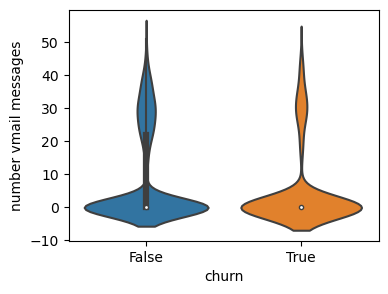

In [39]:
plt.figure(figsize=(4,3))
sns.violinplot(x = 'churn', y = 'number vmail messages', data = data)
plt.show()

Calculating the average number of voice mail messages per day for both loyal and disloyal customers, we find that there is a small gap of around 2 messages between the two groups.

In [40]:
data.groupby(['voice mail plan','churn'])['number vmail messages'].mean()

voice mail plan  churn
no               False     0.000000
                 True      0.000000
yes              False    29.124703
                 True     30.887500
Name: number vmail messages, dtype: float64

### 2.4. Features: international plan

The chart below clearly shows that subscribers with an international plan have a higher churn rate compared to the other subscription groups.

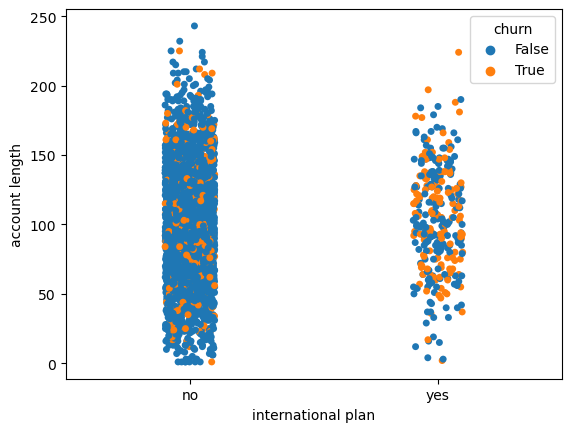

In [41]:
sns.stripplot(x = 'international plan', y = 'account length', data = data, hue = 'churn',alpha=1);

In [42]:
counts_intl_plan = data.groupby('international plan')['churn'].value_counts()
print(counts_intl_plan)
percentages_intl_plan = data.groupby('international plan')['churn'].value_counts(normalize=True) * 100
print('----')
print(percentages_intl_plan)

international plan  churn
no                  False    2664
                    True      346
yes                 False     186
                    True      137
Name: count, dtype: int64
----
international plan  churn
no                  False    88.504983
                    True     11.495017
yes                 False    57.585139
                    True     42.414861
Name: proportion, dtype: float64


In [43]:
percentages_intl_plan.loc[:,True]

international plan
no     11.495017
yes    42.414861
Name: proportion, dtype: float64

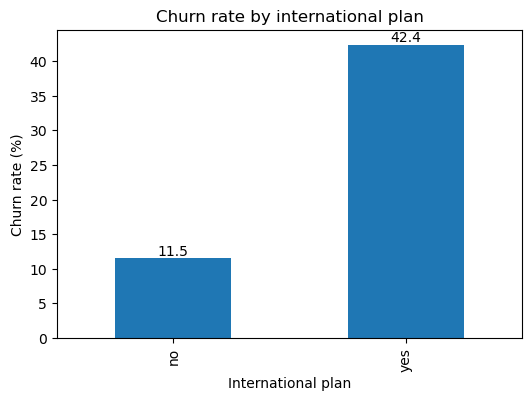

In [44]:
percentages_intl_plan_true = percentages_intl_plan.loc[:, True]

plt.figure(figsize=(6, 4))
ax = percentages_intl_plan_true.plot(kind='bar')
plt.xlabel('International plan')
plt.ylabel('Churn rate (%)')
plt.title('Churn rate by international plan')

# Add the numerical values on top of the bars
for i, v in enumerate(percentages_intl_plan_true):
    ax.text(i, v, str(round(v, 1)), ha='center', va='bottom')

plt.show()

The churn rate of subscribers with an international plan is more than three times higher compared to those without a subscription. This raises concerns that the high cost of international calls might be causing customers to switch to other operators.

### 2.5. Feature: total intl charge

In [45]:
data.groupby('churn')['total intl charge'].mean()

churn
False    2.743404
True     2.889545
Name: total intl charge, dtype: float64

In [46]:
data.groupby(['international plan','churn'])['total intl charge'].mean()

international plan  churn
no                  False    2.750586
                    True     2.774017
yes                 False    2.640538
                    True     3.181314
Name: total intl charge, dtype: float64

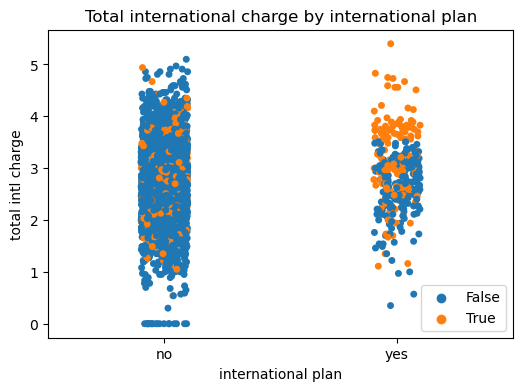

In [47]:
plt.figure(figsize=(6, 4))
sns.stripplot(x = 'international plan', y = 'total intl charge', data = data, hue = 'churn',alpha=1)
plt.title('Total international charge by international plan')
plt.legend(loc='lower right');

As customers pay more for international charges, there is an increased likelihood of them switching to another service provider. This raises concerns about whether the pricing of international charges is competitive enough to retain customers.

### 2.6. Feature: total intl calls

In [48]:
data.groupby('churn')['total intl calls'].mean()

churn
False    4.532982
True     4.163561
Name: total intl calls, dtype: float64

In [49]:
data.groupby(['international plan','churn'])['total intl calls'].mean()

international plan  churn
no                  False    4.493243
                    True     4.251445
yes                 False    5.102151
                    True     3.941606
Name: total intl calls, dtype: float64

In [50]:
data.groupby(['international plan','churn'])['total intl calls'].mean()

international plan  churn
no                  False    4.493243
                    True     4.251445
yes                 False    5.102151
                    True     3.941606
Name: total intl calls, dtype: float64

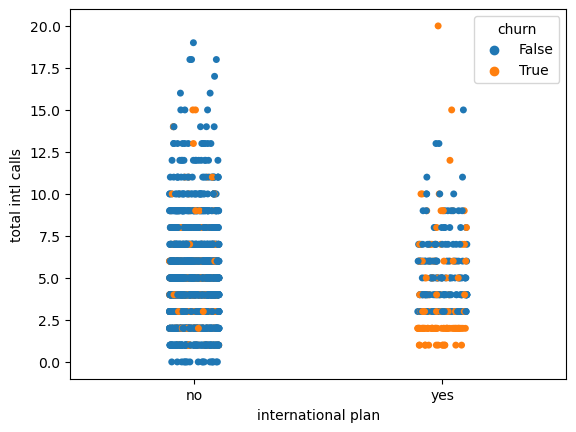

In [51]:
sns.stripplot(x = 'international plan', y = 'total intl calls', data = data, hue = 'churn',alpha=1);

Among customers who have registered for the international plan, churn customers make fewer calls (3.9 calls) compared to non-churn customers (5.1 calls).

### 2.7. Feature: total intl minutes

In [52]:
data.groupby('churn')['total intl minutes'].mean()

churn
False    10.158877
True     10.700000
Name: total intl minutes, dtype: float64

In [53]:
data.groupby(['international plan','churn'])['total intl minutes'].mean()

international plan  churn
no                  False    10.185473
                    True     10.271387
yes                 False     9.777957
                    True     11.782482
Name: total intl minutes, dtype: float64

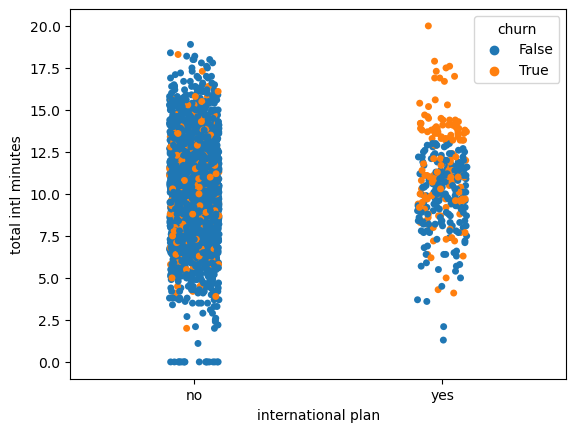

In [54]:
sns.stripplot(x = 'international plan', y = 'total intl minutes', data = data, hue = 'churn',alpha=1);

Same with total internation call charge, the more customers use the service, the more likelihood they would switch to another service providers. 

### 2.8. Feature: customer service calls

In [55]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn', 'account_length_month'],
      dtype='object')

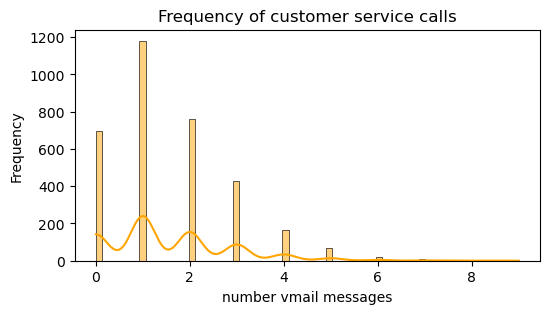

In [56]:
plt.figure(figsize=(6, 3))
sns.histplot(data['customer service calls'], kde=True, color='orange', edgecolor='black')
plt.xlabel('number vmail messages')
plt.ylabel('Frequency')
plt.title('Frequency of customer service calls')
plt.show()

In [57]:
print(data['customer service calls'].value_counts())
print('----')
print(data['customer service calls'].value_counts(normalize=True))

customer service calls
1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: count, dtype: int64
----
customer service calls
1    0.354335
2    0.227723
0    0.209121
3    0.128713
4    0.049805
5    0.019802
6    0.006601
7    0.002700
9    0.000600
8    0.000600
Name: proportion, dtype: float64


In [58]:
data.groupby('churn')['customer service calls'].mean()

churn
False    1.449825
True     2.229814
Name: customer service calls, dtype: float64

In [59]:
data.groupby('customer service calls')['churn'].value_counts()
percentages_cust_ser_call = data.groupby('customer service calls')['churn'].value_counts(normalize=True) * 100
percentages_cust_ser_call

customer service calls  churn
0                       False     86.800574
                        True      13.199426
1                       False     89.669771
                        True      10.330229
2                       False     88.537549
                        True      11.462451
3                       False     89.743590
                        True      10.256410
4                       False     54.216867
                        True      45.783133
5                       True      60.606061
                        False     39.393939
6                       True      63.636364
                        False     36.363636
7                       True      55.555556
                        False     44.444444
8                       False     50.000000
                        True      50.000000
9                       True     100.000000
Name: proportion, dtype: float64

In [60]:
true_perc_cust_ser_calls = percentages_cust_ser_call.loc[:,True]
true_perc_cust_ser_calls

customer service calls
0     13.199426
1     10.330229
2     11.462451
3     10.256410
4     45.783133
5     60.606061
6     63.636364
7     55.555556
8     50.000000
9    100.000000
Name: proportion, dtype: float64

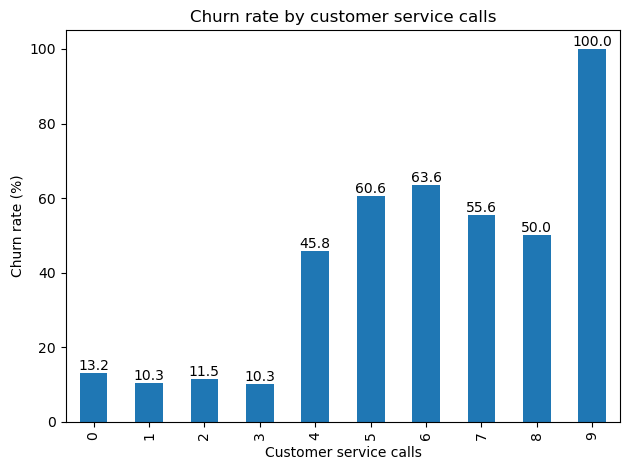

In [61]:
true_perc_cust_ser_calls .plot(kind='bar')
plt.xlabel('Customer service calls')
plt.ylabel('Churn rate (%)')
plt.title('Churn rate by customer service calls')
for x, y in zip(true_perc_cust_ser_calls.index, true_perc_cust_ser_calls.values):
    plt.text(x, y, str(round(y,1)), ha='center', va='bottom', ma = 'center',fontsize=10)

plt.tight_layout()

plt.show();


After the 3rd customer service call, the churn rate significantly increased from 10.3% to nearly 46%. This observation suggests that customers who encounter numerous service-related issues tend to make multiple calls to customer service before ultimately switching to other service providers.

Plotting the number of day, evening, and international calls in relation to customer service calls allows us to evaluate the churn trend associated with customer service interactions. From below charts, from 4th customers service call, customer churn picked up significantly.

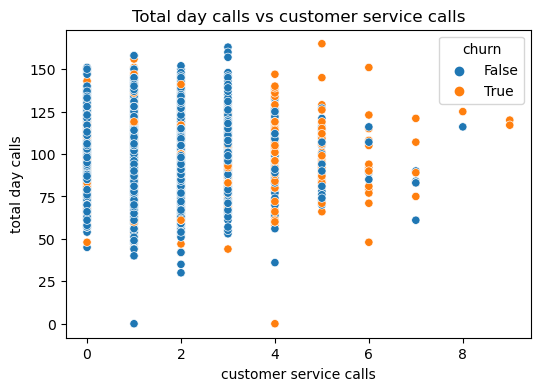

In [62]:
fig, ax = plt.subplots(figsize = (6,4))
sns.scatterplot(x = 'customer service calls', y = 'total day calls', 
                hue = 'churn', data = data)
plt.title('Total day calls vs customer service calls')
plt.show()

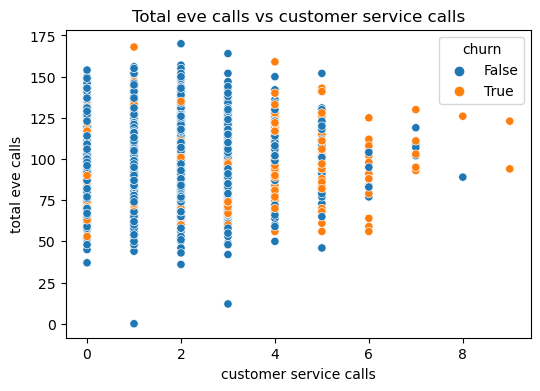

In [63]:
fig, ax = plt.subplots(figsize = (6,4))
sns.scatterplot(x = 'customer service calls', y = 'total eve calls', 
                hue = 'churn', data = data)
plt.title('Total eve calls vs customer service calls')
plt.show()

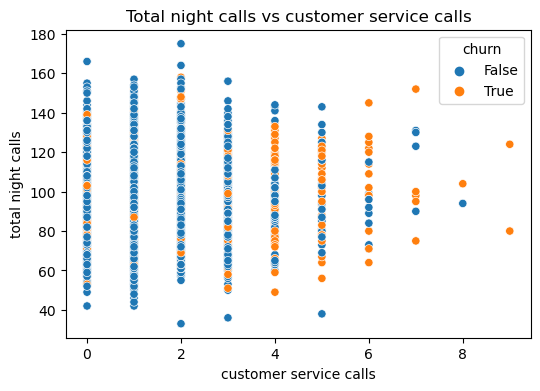

In [64]:
fig, ax = plt.subplots(figsize = (6,4))
sns.scatterplot(x = 'customer service calls', y = 'total night calls', 
                hue = 'churn', data = data)
plt.title('Total night calls vs customer service calls')
plt.show()

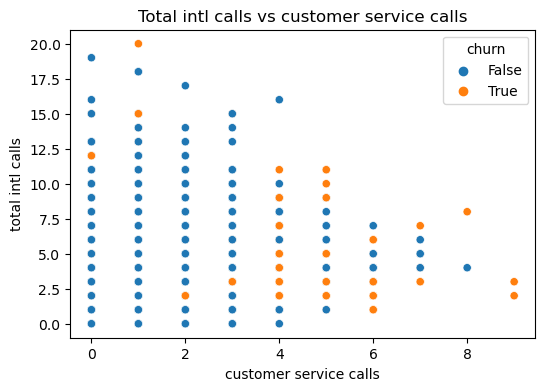

In [65]:
fig, ax = plt.subplots(figsize = (6,4))
sns.scatterplot(x = 'customer service calls', y = 'total intl calls', 
                hue = 'churn', data = data)
plt.title('Total intl calls vs customer service calls')
plt.show()

### 2.9. Feature: total day calls

In [66]:
data.groupby('churn')['total day calls'].mean()

churn
False    100.283158
True     101.335404
Name: total day calls, dtype: float64

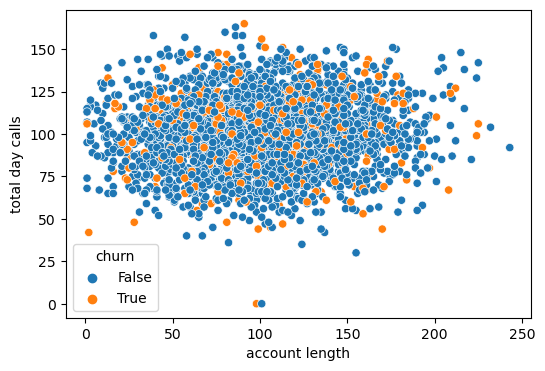

In [67]:
fig, ax = plt.subplots(figsize = (6,4))
sns.scatterplot(x = 'account length', y = 'total day calls', 
                hue = 'churn', data = data)
# plt.title()
plt.show()

There is no distinct grouping observed between churn and non-churn customers.

### 2.10. Feature: total day minutes

In [68]:
data.groupby('churn')['total day minutes'].mean()

churn
False    175.175754
True     206.914079
Name: total day minutes, dtype: float64

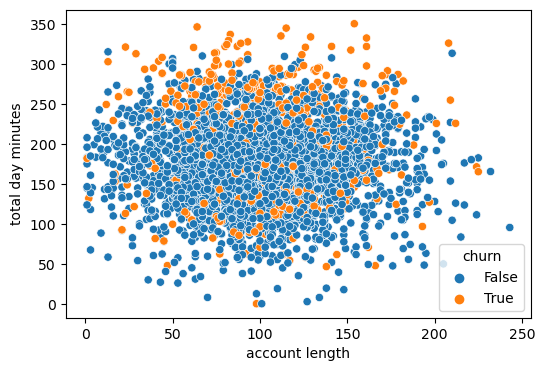

In [69]:
fig, ax = plt.subplots(figsize = (6,4))
sns.scatterplot(x = 'account length', y = 'total day minutes', 
                hue = 'churn', data = data)
# plt.title()
plt.show()

Churn customer makes more day call minutes than non-churn customers.

### 2.11. Feature: total day charge

In [70]:
data.groupby('churn')['total day charge'].mean()

churn
False    29.780421
True     35.175921
Name: total day charge, dtype: float64

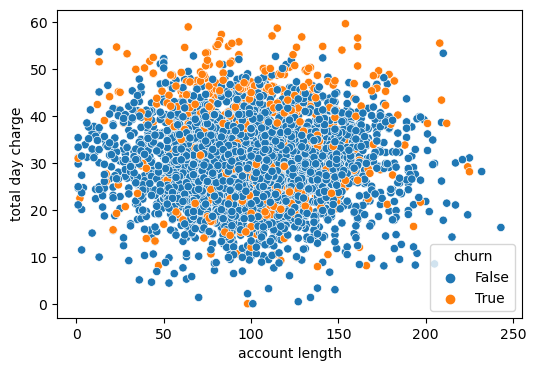

In [71]:
fig, ax = plt.subplots(figsize = (6,4))
sns.scatterplot(x = 'account length', y = 'total day charge', 
                hue = 'churn', data = data)
# plt.title()
plt.show()

When customers have to pay more for the service, they tend to switch to another service provider.

### 2.12. Feature: total eve calls

In [72]:
data.groupby('churn')['total eve calls'].mean()

churn
False    100.038596
True     100.561077
Name: total eve calls, dtype: float64

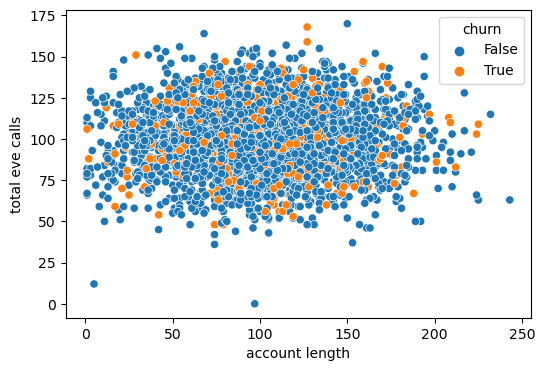

In [73]:
fig, ax = plt.subplots(figsize = (6,4))
sns.scatterplot(x = 'account length', y = 'total eve calls', 
                hue = 'churn', data = data)
# plt.title()
plt.show()

### 2.13. Feature: total eve minutes

In [74]:
data.groupby('churn')['total eve minutes'].mean()

churn
False    199.043298
True     212.410145
Name: total eve minutes, dtype: float64

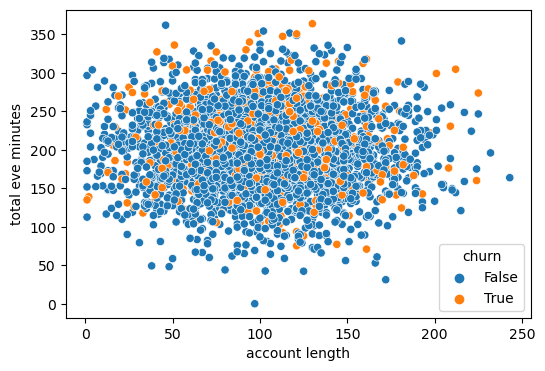

In [75]:
fig, ax = plt.subplots(figsize = (6,4))
sns.scatterplot(x = 'account length', y = 'total eve minutes', 
                hue = 'churn', data = data)
# plt.title()
plt.show()

### 2.14. Feature: total eve charge

In [76]:
data.groupby('churn')['total eve charge'].mean()

churn
False    16.918909
True     18.054969
Name: total eve charge, dtype: float64

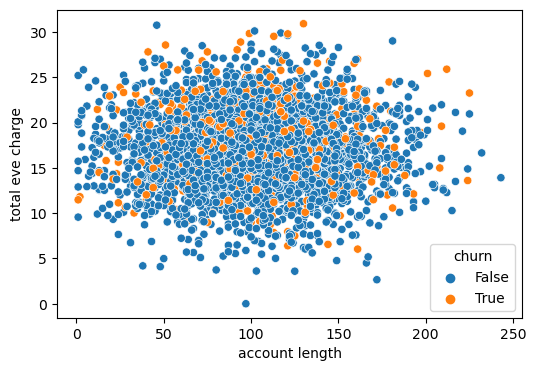

In [77]:
fig, ax = plt.subplots(figsize = (6,4))
sns.scatterplot(x = 'account length', y = 'total eve charge', 
                hue = 'churn', data = data)
# plt.title()
plt.show()

There is no evident clustering pattern between churn and non-churn customers in terms of total  evening charges. However, it is worth noting that, on average, churn customers tend to pay approximately 12.5% higher compared to non-churn customers.

### 2.15. Feature: total night calls

In [78]:
data.groupby('churn')['total night calls'].mean()

churn
False    100.058246
True     100.399586
Name: total night calls, dtype: float64

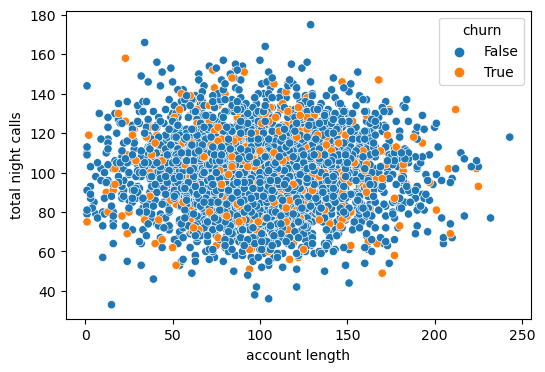

In [79]:
fig, ax = plt.subplots(figsize = (6,4))
sns.scatterplot(x = 'account length', y = 'total night calls', 
                hue = 'churn', data = data)
# plt.title()
plt.show()

### 2.16. Feature: total night minutes

In [80]:
data.groupby('churn')['total night minutes'].mean()

churn
False    200.133193
True     205.231677
Name: total night minutes, dtype: float64

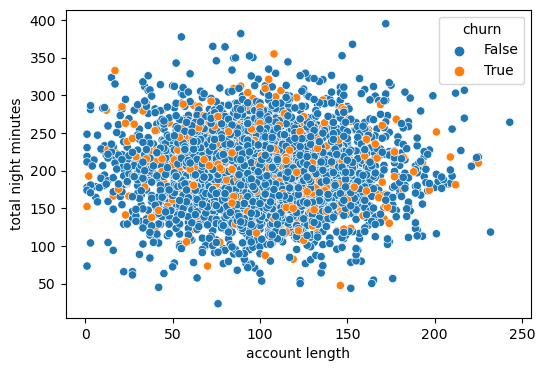

In [81]:
fig, ax = plt.subplots(figsize = (6,4))
sns.scatterplot(x = 'account length', y = 'total night minutes', 
                hue = 'churn', data = data)
# plt.title()
plt.show()

### 2.17. Feature: total night charge

In [100]:
data.groupby('churn')['total night charge'].mean()

churn
0    9.006074
1    9.235528
Name: total night charge, dtype: float64

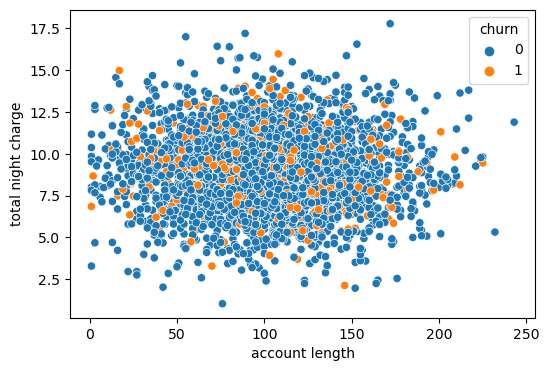

In [101]:
fig, ax = plt.subplots(figsize = (6,4))
sns.scatterplot(x = 'account length', y = 'total night charge', 
                hue = 'churn', data = data)
# plt.title()
plt.show()


No significant insights can be drawn from the analysis of total night calls, total night minutes, and total night charge in relation to churn.

### 2.18. Feature: area code

In [102]:
data['area code'].value_counts(normalize=True)

area code
415    0.496550
510    0.252025
408    0.251425
Name: proportion, dtype: float64

Nearly 50% of customers are in area code 415 (San Francisco and its northern suburbs). The rest is equally shared between aread code 510 (California area code that covers the Eastern Bay Area cities, including Oakland) and 408 (California Southern Bay Area area code that covers most of Santa Clara County, including Sunnyvale, Cupertino, and San Jose).

In [103]:
counts_voicemail_plan = data.groupby('area code')['churn'].value_counts()
print(counts_voicemail_plan)
percentages_voicemail_plan = data.groupby('area code')['churn'].value_counts(normalize=True) * 100
print('----')
print(percentages_voicemail_plan)

area code  churn
408        0         716
           1         122
415        0        1419
           1         236
510        0         715
           1         125
Name: count, dtype: int64
----
area code  churn
408        0        85.441527
           1        14.558473
415        0        85.740181
           1        14.259819
510        0        85.119048
           1        14.880952
Name: proportion, dtype: float64


The churn rate is relatively consistent across the three area codes, ranging from approximately 14% to 15%.

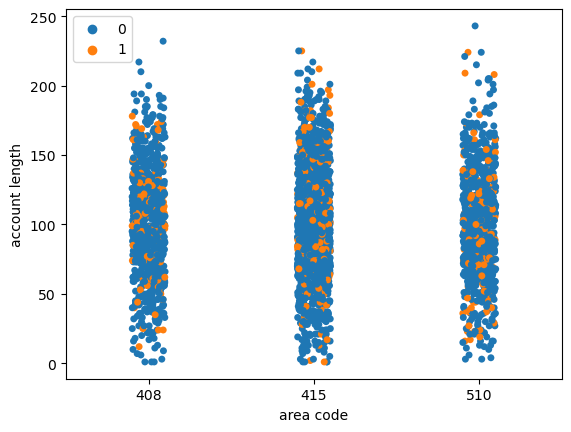

In [104]:
sns.stripplot(x = 'area code', y = 'account length', data = data, hue = 'churn')
plt.legend(loc='upper left');

When plotting the account length against the area code and differentiating between churn and non-churn customers, no distinct classifications can be identified.

### 2.19. Feature: state

In [105]:
data['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [106]:
len(data['state'].unique())

51

In [107]:
data['state'].value_counts(normalize=True)

state
WV    0.031803
MN    0.025203
NY    0.024902
AL    0.024002
WI    0.023402
OH    0.023402
OR    0.023402
WY    0.023102
VA    0.023102
CT    0.022202
MI    0.021902
ID    0.021902
VT    0.021902
TX    0.021602
UT    0.021602
IN    0.021302
MD    0.021002
KS    0.021002
NC    0.020402
NJ    0.020402
MT    0.020402
CO    0.019802
NV    0.019802
WA    0.019802
RI    0.019502
MA    0.019502
MS    0.019502
AZ    0.019202
FL    0.018902
MO    0.018902
NM    0.018602
ME    0.018602
ND    0.018602
NE    0.018302
OK    0.018302
DE    0.018302
SC    0.018002
SD    0.018002
KY    0.017702
IL    0.017402
NH    0.016802
AR    0.016502
GA    0.016202
DC    0.016202
HI    0.015902
TN    0.015902
AK    0.015602
LA    0.015302
PA    0.013501
IA    0.013201
CA    0.010201
Name: proportion, dtype: float64

Customers are on over 51 states/terriories in the United States and looking at the weight of each state, it ranges from ~1% to ~3%, which is not significantly imbalanced so that we can drop this column and focus on more informative columns.

### 2.20. Feature: Phone number

Besides, phone numbers are unique value for each customers and cannot provide any overall information so that we can also drop this column.

### 2.21. Target: Churn rate

In [108]:
data['churn'].value_counts(normalize=True)

churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64

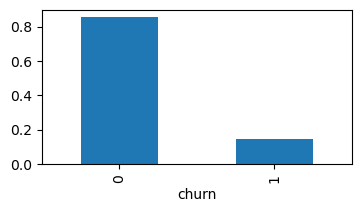

In [109]:
plt.figure(figsize=(4,2))
data['churn'].value_counts(normalize=True).plot(kind="bar");

Target churn rate is binary data, in which churn rate (True) is approximately 15%.

Turn target column into numeric column.

In [110]:
data['churn'] = data['churn'].astype(int)

### Dropping features

Given the lack of meaningful insights obtained from 3 columns which are area code, state and phone numbers, it is recommended to exclude them from the subsequent modeling steps.

Additionally, in order to address potential collinearity issues, we will now solely concentrate on the "account length" column and exclude the "account length month" column from further analysis.

In [111]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn', 'account_length_month'],
      dtype='object')

In [112]:
data_drop = data.drop(columns =['area code','state','phone number','account_length_month'])

Turn target column into numbers.

In [113]:
data_drop.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Turning target column into number for further steps.

In [96]:
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   object 
 2   voice mail plan         3333 non-null   object 
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

# SUMMARY

Since the target variable has two binary values, with False (0) indicating staying customers and True (1) representing churning customers, we will proceed to apply a classification model to predict the possibility of customers to stay or to leave. This analysis will help us understand the level of importance of different features in relation to the target variable, allowing us to identify the factors that significantly influence customer churn.

There are 17 features that we will include as inputs in the model. Among these features, there are several that have shown a strong correlation with the target variable and have exhibited distinct grouping in relation to the churn rate. These features include: customer service calls, international plan, total intl charge, total day charge, total day minutes, account length, and voice mail plan.

After cleaning the data, data_drop dataframe will be used for further modelling steps.

In [97]:
data_drop.to_csv('Data/data_drop.csv')

In [98]:
data_drop.shape

(3333, 18)

In [99]:
data_drop.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
